# This script processes the file All_Optimizations.csv  

1. Generate the file All_Optimizations.txt by running:
    1. process_baseline_results.ipynb (for Baseline)
    2. process_opt1_results.ipynb (for Opt1-Quadtree)
    3. o2and3_minradius.ipynb (for Opt2-minradius)
    4. o2and3_maxnumber.ipynb (for Opt2-maxnumber)
    5. sycl_minrad_maxnum.ipynb (for Opt3-Memo-* using 1 thread and Par8Cores-* wiht 8 threads)


2. Run the next cells in this notebook...

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

df=pd.read_csv('All_Optimizations_minrad.csv',sep=';')
df['Total']=df['Time Tree']+df['Time OWM']
df.head()

,Optimization,Cloud,Time Tree,Time OWM,Total
0,Baseline,Alcoy,4.74,22.55,27.29
1,Baseline,Arzua,5.75,22.94,28.69
2,Baseline,BrionF,5.97,19.75,25.72
3,Baseline,BrionU,6.76,21.30,28.06
4,Opt1-Quadtree,Alcoy,3.18,12.48,15.66


In [156]:
base=df.loc[0:3,'Time Tree':'Total']
best=df.loc[16:19,'Time Tree':'Total']
print(base)
print(best)

   Time Tree  Time OWM  Total
0       4.74     22.55  27.29
1       5.75     22.94  28.69
2       5.97     19.75  25.72
3       6.76     21.30  28.06
    Time Tree  Time OWM  Total
16       0.14      0.21   0.35
17       0.26      0.21   0.47
18       0.50      0.14   0.64
19       0.57      0.16   0.73


In [157]:
b=np.array(base)
c=np.array(best)
speedup=b/c
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}x".format(x)})
#Print total speedup for each cloud (one cloud per row, one column for ech time measurement)
print(speedup)

[[33.86x 107.38x 77.97x]
 [22.12x 109.24x 61.04x]
 [11.94x 141.07x 40.19x]
 [11.86x 133.12x 38.44x]]


# Speedup of each optimization w.r.t. the previous one

In [158]:
df['Tree Sp']=1
df['OWM Sp']=1
df['Total Sp']=1

#Speedup of one optimization w.r.t. the previous one
for i in range(4,len(df)):
    df.loc[i,'Tree Sp']=df['Time Tree'][i-4]/df['Time Tree'][i]
    df.loc[i,'OWM Sp']=df['Time OWM'][i-4]/df['Time OWM'][i]
    df.loc[i,'Total Sp']=df['Total'][i-4]/df['Total'][i]
df

,Optimization,Cloud,Time Tree,Time OWM,Total,Tree Sp,OWM Sp,Total Sp
0,Baseline,Alcoy,4.74,22.55,27.29,1.000000,1.000000,1.000000
1,Baseline,Arzua,5.75,22.94,28.69,1.000000,1.000000,1.000000
2,Baseline,BrionF,5.97,19.75,25.72,1.000000,1.000000,1.000000
3,Baseline,BrionU,6.76,21.30,28.06,1.000000,1.000000,1.000000
4,Opt1-Quadtree,Alcoy,3.18,12.48,15.66,1.490566,1.806891,1.742656
5,Opt1-Quadtree,Arzua,3.77,10.03,13.80,1.525199,2.287139,2.078986
6,Opt1-Quadtree,BrionF,4.03,11.07,15.10,1.481390,1.784101,1.703311
7,Opt1-Quadtree,BrionU,4.50,12.98,17.48,1.502222,1.640986,1.605263
8,Opt2-MinRadius,Alcoy,1.02,1.63,2.65,3.117647,7.656442,5.909434
9,Opt2-MinRadius,Arzua,1.61,2.20,3.81,2.341615,4.559091,3.622047


# Important notice

**The sum of the relative speedups (one optim. wrt the previous one) is not the total speedup**

In [159]:
df.groupby('Cloud').sum().drop(['Time Tree','Time OWM','Total'],axis=1)

/var/folders/3m/wbwr7b111j5gzwwf_cf38xwc0000gn/T/ipykernel_50214/4234181207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cloud').sum().drop(['Time Tree','Time OWM','Total'],axis=1)


,Tree Sp,OWM Sp,Total Sp
Cloud,,,
Alcoy,13.893927,17.015714,15.846569
Arzua,12.059122,15.084325,13.872894
BrionF,10.625571,16.363298,12.292670
BrionU,10.588592,16.412375,12.208384


# Speedup of each optimization w.r.t. baseline

In [160]:
#Speedup of one optimization w.r.t. baseline
for i in range(4,len(df),4):
    for j in range(4):
        df.loc[i+j,'Tree Sp']=df['Time Tree'][j]/df['Time Tree'][i+j]
        df.loc[i+j,'OWM Sp']=df['Time OWM'][j]/df['Time OWM'][i+j]
        df.loc[i+j,'Total Sp']=df['Total'][j]/df['Total'][i+j]
df

,Optimization,Cloud,Time Tree,Time OWM,Total,Tree Sp,OWM Sp,Total Sp
0,Baseline,Alcoy,4.74,22.55,27.29,1.000000,1.000000,1.000000
1,Baseline,Arzua,5.75,22.94,28.69,1.000000,1.000000,1.000000
2,Baseline,BrionF,5.97,19.75,25.72,1.000000,1.000000,1.000000
3,Baseline,BrionU,6.76,21.30,28.06,1.000000,1.000000,1.000000
4,Opt1-Quadtree,Alcoy,3.18,12.48,15.66,1.490566,1.806891,1.742656
5,Opt1-Quadtree,Arzua,3.77,10.03,13.80,1.525199,2.287139,2.078986
6,Opt1-Quadtree,BrionF,4.03,11.07,15.10,1.481390,1.784101,1.703311
7,Opt1-Quadtree,BrionU,4.50,12.98,17.48,1.502222,1.640986,1.605263
8,Opt2-MinRadius,Alcoy,1.02,1.63,2.65,4.647059,13.834356,10.298113
9,Opt2-MinRadius,Arzua,1.61,2.20,3.81,3.571429,10.427273,7.530184


In [161]:
df[df['Cloud']=='Alcoy']['OWM Sp']

0       1.000000
4       1.806891
8      13.834356
12     21.476190
16    107.380952
Name: OWM Sp, dtype: float64

In [162]:
df[df['Cloud']=='Alcoy']['OWM Sp']/107.38*100

0       0.931272
4       1.682707
8      12.883550
12     20.000177
16    100.000887
Name: OWM Sp, dtype: float64

# Spedup for each cloud

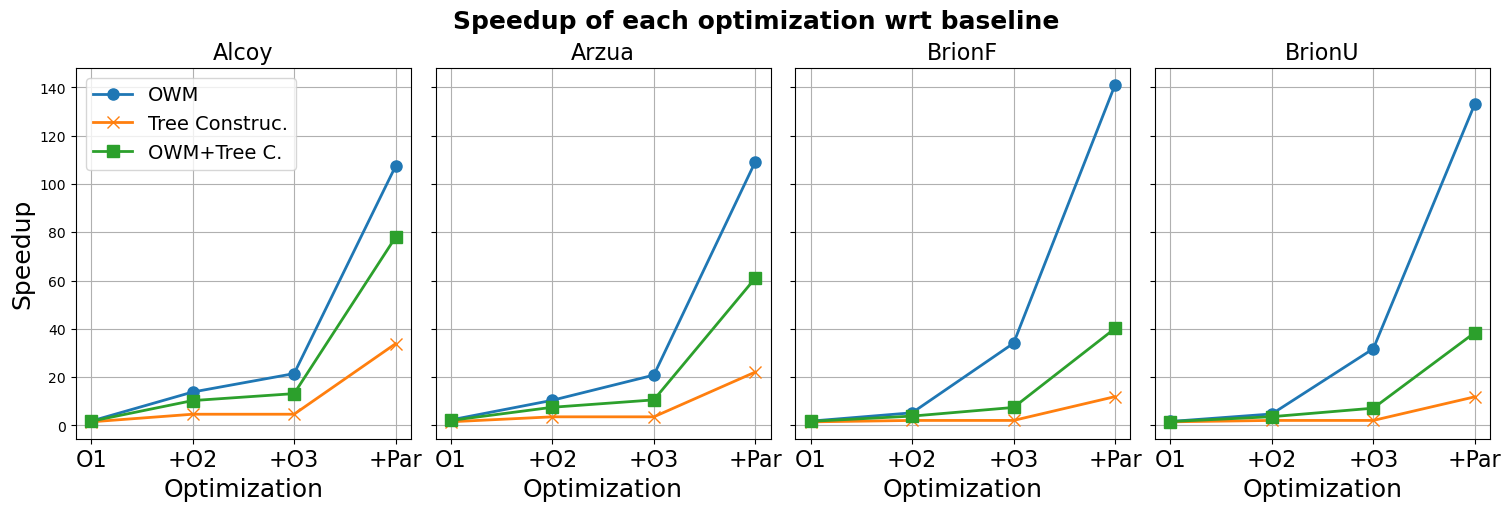

In [163]:
def plot_allsp(df):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    all=np.array(df.loc[4:,'Tree Sp':'Total Sp'])
    clouds=list(df.loc[0:3,'Cloud'])
    bycloud={}
    for i,j in zip(clouds,range(len(clouds))):
        bycloud[i]=all[j::4].T

    #fig = plt.figure()
    labels=['OWM','Tree Construc.','OWM+Tree C.']
    x=np.arange(1,5)
    xlab=['O1','+O2','+O3','+Par']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True, sharey=True)
    for i,name in zip(range(len(clouds)),clouds):
        axs[i].plot(x, bycloud[name][1], marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][0], marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][2], marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Optimization', fontsize=xlabelfs)
        axs[i].set_xticks(x,labels=xlab,fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Speedup of each optimization wrt baseline',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_optim.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()

plot_allsp(df)

In [164]:
all=np.array(df.loc[4:,'Tree Sp':'Total Sp'])
clouds=list(df.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j::4]
bycloud    
#bycloud['Alcoy'][1]
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}%".format(x)})
for i in clouds:
    bycloud[i]=bycloud[i]/bycloud[i][-1]*100
    #print(bycloud[i])
print("Adapt for stacked bar plot")    
for i in clouds:
    for j in range(3,0,-1):
        bycloud[i][j]=bycloud[i][j]-bycloud[i][j-1]
    print(bycloud[i])
# allcloudstack=bycloud['Alcoy']#[:,0:2]
# for i in clouds[1:]:
#     allcloudstack=np.hstack((allcloudstack,bycloud[i]))
# allcloudstack[0][0::3]    
#allcloudstack.transpose(2,1,0)    
bycloud
#here the order of the indices are cloud, optimization,time
all=np.array([bycloud[x] for x in clouds])
all.shape
#see this to understand the transpose https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array
#now the order of the indices are time, optimization, cloud
all=all.transpose(2,1,0)

all

   

Adapt for stacked bar plot
[[4.40% 1.68% 2.23%]
 [9.32% 11.20% 10.97%]
 [0.00% 7.12% 3.70%]
 [86.27% 80.00% 83.09%]]
[[6.90% 2.09% 3.41%]
 [9.25% 7.45% 8.93%]
 [0.00% 9.55% 5.01%]
 [83.85% 80.91% 82.66%]]
[[12.41% 1.26% 4.24%]
 [5.01% 2.45% 5.40%]
 [0.00% 20.42% 8.91%]
 [82.58% 75.86% 81.45%]]
[[12.67% 1.23% 4.18%]
 [4.87% 2.34% 5.27%]
 [0.00% 20.31% 9.18%]
 [82.46% 76.12% 81.38%]]


array([[[4.40%, 6.90%, 12.41%, 12.67%],
        [9.32%, 9.25%, 5.01%, 4.87%],
        [0.00%, 0.00%, 0.00%, 0.00%],
        [86.27%, 83.85%, 82.58%, 82.46%]],

       [[1.68%, 2.09%, 1.26%, 1.23%],
        [11.20%, 7.45%, 2.45%, 2.34%],
        [7.12%, 9.55%, 20.42%, 20.31%],
        [80.00%, 80.91%, 75.86%, 76.12%]],

       [[2.23%, 3.41%, 4.24%, 4.18%],
        [10.97%, 8.93%, 5.40%, 5.27%],
        [3.70%, 5.01%, 8.91%, 9.18%],
        [83.09%, 82.66%, 81.45%, 81.38%]]])

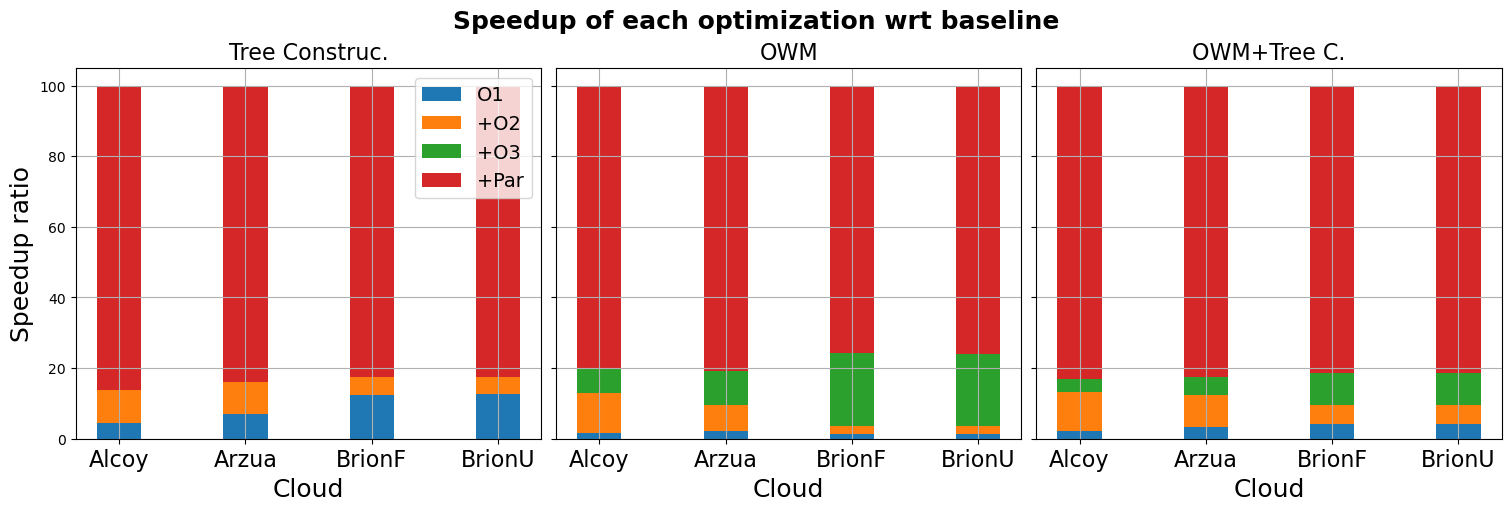

In [165]:
def plot_allsp100(npa):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']


    #fig = plt.figure()
    plots=['Tree Construc.','OWM','OWM+Tree C.']
    clouds=['Alcoy','Arzua','BrionF','BrionU']
    x=np.arange(1,len(clouds)+1)
    optim=['O1','+O2','+O3','+Par']
    width=0.35
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)
    for i,name in zip(range(len(plots)),plots):
        b=np.zeros(len(clouds))
        for j,z in zip(optim,range(len(optim))):
            axs[i].bar(x, npa[i][z], width, label=j, bottom=b)
            b=b+npa[i][z]

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Cloud', fontsize=xlabelfs)
        axs[i].set_xticks(x,labels=clouds,fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Speedup of each optimization wrt baseline',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Speedup ratio', fontsize=ylabelfs)
    axs[0].legend(optim,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_optim_ratio.pdf")
    pp.savefig(fig)
    pp.close()

plot_allsp100(all)

# Build LaTeX table with speedups due to optimizations 1, 2 and 3

In [174]:
all=np.array(df.loc[4:,'Tree Sp':'OWM Sp'])
clouds=list(df.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j:12:4]

np.set_printoptions(formatter={'float': lambda x: "& {0:0.2f}x ".format(x)})    
bycloud


{'Alcoy': array([[& 1.49x , & 1.81x ],
        [& 4.65x , & 13.83x ],
        [& 4.65x , & 21.48x ]]),
 'Arzua': array([[& 1.53x , & 2.29x ],
        [& 3.57x , & 10.43x ],
        [& 3.57x , & 20.85x ]]),
 'BrionF': array([[& 1.48x , & 1.78x ],
        [& 2.08x , & 5.24x ],
        [& 2.08x , & 34.05x ]]),
 'BrionU': array([[& 1.50x , & 1.64x ],
        [& 2.08x , & 4.75x ],
        [& 2.08x , & 31.79x ]])}

In [184]:
print("\\begin{tabular}{c|cc|cc|cc|}\hline")
print("Cloud & \multicolumn{2}{c|}{O1} & \multicolumn{2}{c|}{+O2} & \multicolumn{2}{c|}{+O3} \\\\ \hline")  
print(" & Tree & OWM & Tree & OWM & Tree & OWM & Tree & OWM \\\\ \hline")
for i in clouds:
    print(i,end='')
    for j in range(3):
        for k in range(2):
            print("& {0:0.2f}x ".format(bycloud[i][j][k]),end='')

    print("\\\\ \hline")
print("\\end{tabular}")

\begin{tabular}{c|cc|cc|cc|}\hline
Cloud & \multicolumn{2}{c|}{O1} & \multicolumn{2}{c|}{+O2} & \multicolumn{2}{c|}{+O3} \\ \hline
 & Tree & OWM & Tree & OWM & Tree & OWM & Tree & OWM \\ \hline
Alcoy& 1.49x & 1.81x & 4.65x & 13.83x & 4.65x & 21.48x \\ \hline
Arzua& 1.53x & 2.29x & 3.57x & 10.43x & 3.57x & 20.85x \\ \hline
BrionF& 1.48x & 1.78x & 2.08x & 5.24x & 2.08x & 34.05x \\ \hline
BrionU& 1.50x & 1.64x & 2.08x & 4.75x & 2.08x & 31.79x \\ \hline
\end{tabular}
